<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
First layer of a neural network that contains all inputted information - no bias
### Hidden Layer:
Layer between the input and output layers, can contain any number of neurons. 
### Output Layer:
Last layer, uses activation function to produce the output of the model
### Neuron:
information processing unit receives and input then transforms it via activation function
### Weight:
Value for each neuron that multiplies the output of the activation function
### Activation Function:
function applied to the information at the neuronal level
### Node Map:
Visual diagram or map of the architecture of a given neural network
### Perceptron:
Simplest of neural net consisting of single neuron

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

Data is fed to the input layer, at each layer of the NN weights and biases are applied, then data is transformed via activation function. The weights and biases determine the impact of the layers activation functions on the successive layer. This continues through n-layers until the output layer is reached at which point a final transformation takes place based on the type of problem to coalesce the final results.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0],
         'bias': [1,1,1,1]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [0]:
class Perceptron(object):
    
    def __init__(self, rate = .01, niter = 1000):
        self.rate = rate
        self.niter = niter
    
    @staticmethod
    def sigmoid(x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def fit(self, X, y):

        self.weight = 2 * np.random.random((1, X.shape[1])) - 1
        self.errors = [] 

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                pred = self.predict(xi)
                delta_w = self.rate * (target - pred) * self.sigmoid_derivative(xi)
                self.weight += delta_w * xi
                err += int(np.linalg.norm(delta_w) != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        return np.dot(self.weight, X)

    def predict(self, X):
        return self.sigmoid(self.net_input(X))

In [0]:
p = Perceptron()

In [142]:
p.fit(df[['x1','x2', 'bias']].values, df['y'].values)

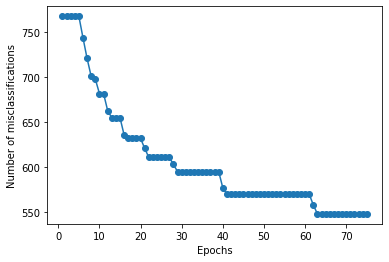

In [143]:
import matplotlib.pyplot as plt

pn = Perceptron(0.5, 75)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [122]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [123]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, OrdinalEncoder
y = diabetes['Outcome']
encoded = OrdinalEncoder().fit_transform(diabetes)
diabetes_encoded = pd.DataFrame(encoded)
diabetes_encoded.columns = diabetes.columns
diabetes_encoded.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,86.0,22.0,28.0,0.0,123.0,350.0,29.0,1.0
1,1.0,23.0,19.0,22.0,0.0,62.0,196.0,10.0,0.0
2,8.0,121.0,17.0,0.0,0.0,30.0,368.0,11.0,1.0
3,1.0,27.0,19.0,16.0,62.0,77.0,53.0,0.0,0.0
4,0.0,75.0,4.0,28.0,102.0,209.0,514.0,12.0,1.0


In [0]:
X = encoded[:,[0,8]]

In [0]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    self.weight = np.zeros(1 + X.shape[1]) # weights
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):

      err = 0
      for xi, target in zip(X, y):
      
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
      
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

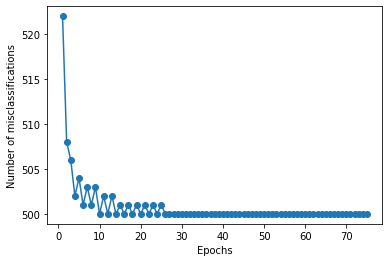

In [138]:
import matplotlib.pyplot as plt

pn = Perceptron(0.5, 75)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [136]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


train_predictions = pn.predict(X)

print(f'Train Accuracy: {(accuracy_score(y, train_predictions)*100):.02f}%')

Train Accuracy: 34.90%


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?